In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Unable to revert mtime: /Library/Fonts
Matplotlib is building the font cache; this may take a moment.


In [9]:
year = 2023

player_stats = pd.read_csv(f'/Users/cb/src/nba_mvp_ml/data/processed/by_season/stats_{year}.csv')
team_stats = pd.read_csv(f'/Users/cb/src/nba_mvp_ml/data/processed/by_season/team_stats_{year}.csv')

# Add '_team' suffix to all columns except identifying columns
team_stats = team_stats.rename(
    columns={col: f"{col}_team" for col in team_stats.columns if col not in ['SEASON_ID', 'LEAGUE_ID', 'TEAM_ID', 'TEAM_ABBREVIATION']}
)

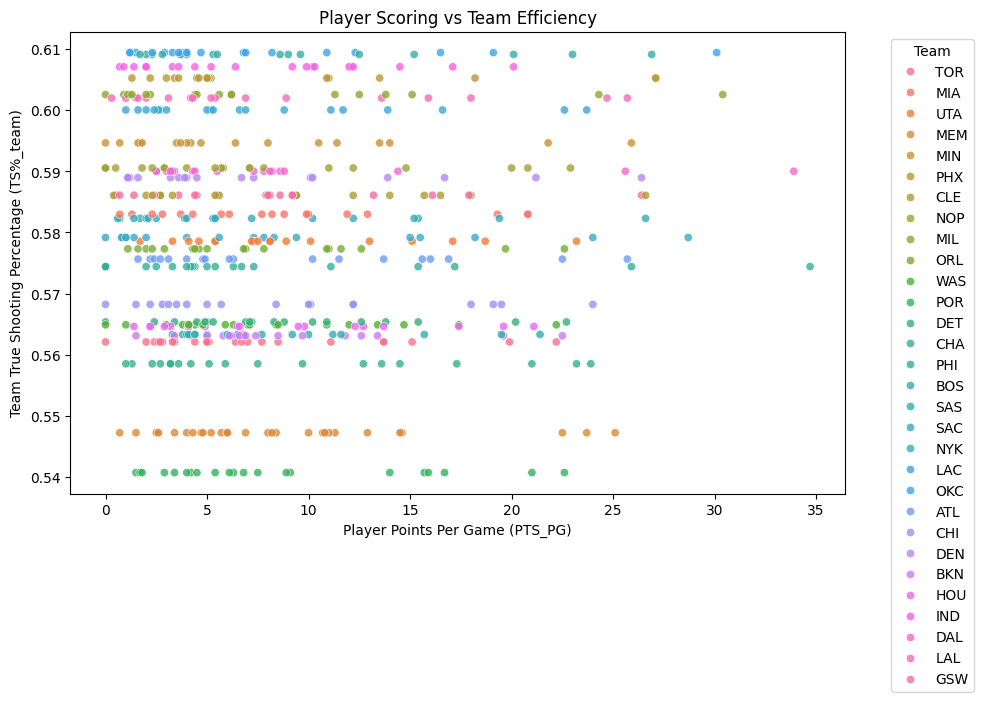

In [10]:
# Match team stats using TEAM_ID without merging
player_team_stats = player_stats.copy()
player_team_stats['PTS_PG_team'] = player_team_stats['TEAM_ID'].map(team_stats.set_index('TEAM_ID')['PTS_PG_team'])
player_team_stats['TS%_team'] = player_team_stats['TEAM_ID'].map(team_stats.set_index('TEAM_ID')['TS%_team'])

# Scatter plot for player PTS_PG vs. team TS%_team
plt.figure(figsize=(10, 6))
sns.scatterplot(data=player_team_stats, x='PTS_PG', y='TS%_team', hue='TEAM_ABBREVIATION', alpha=0.8)
plt.title('Player Scoring vs Team Efficiency')
plt.xlabel('Player Points Per Game (PTS_PG)')
plt.ylabel('Team True Shooting Percentage (TS%_team)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Team')
plt.show()

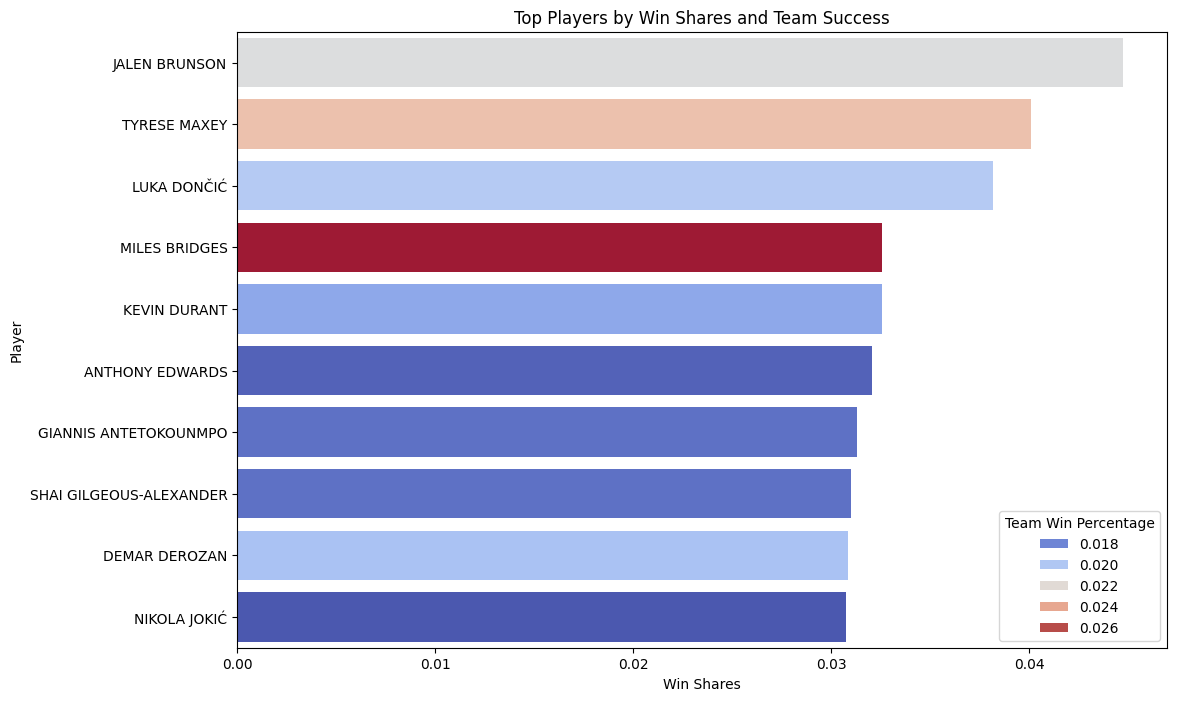

In [11]:
# Calculate team win percentage
team_stats['Win_Pct_team'] = team_stats['PTS_PG_team'] / team_stats['Possessions_team']

# Add team win percentage to player stats using TEAM_ID
player_team_stats['Win_Pct_team'] = player_team_stats['TEAM_ID'].map(team_stats.set_index('TEAM_ID')['Win_Pct_team'])

# Top 10 players by Win Shares
top_ws_players = player_team_stats.nlargest(10, 'WS')

# Barplot for top players by Win Shares
plt.figure(figsize=(12, 8))
sns.barplot(data=top_ws_players, x='WS', y='PLAYER_FULLNAME', hue='Win_Pct_team', dodge=False, palette='coolwarm')
plt.title('Top Players by Win Shares and Team Success')
plt.xlabel('Win Shares')
plt.ylabel('Player')
plt.legend(title='Team Win Percentage')
plt.show()

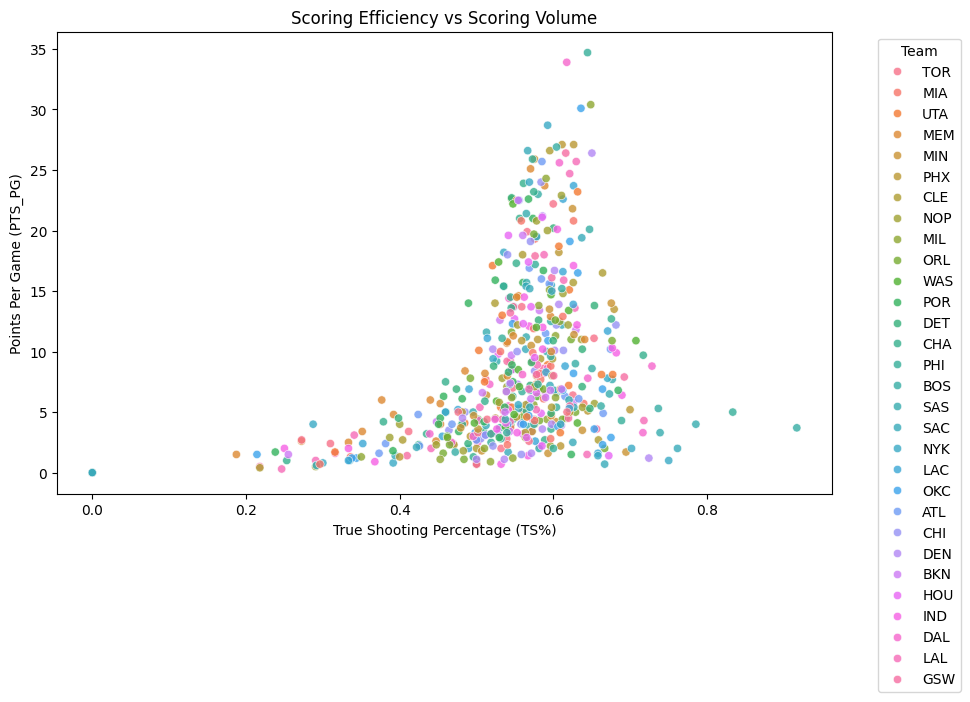

In [12]:
# Scatter plot for efficiency vs volume
plt.figure(figsize=(10, 6))
sns.scatterplot(data=player_stats, x='TS%', y='PTS_PG', hue='TEAM_ABBREVIATION', alpha=0.8)
plt.title('Scoring Efficiency vs Scoring Volume')
plt.xlabel('True Shooting Percentage (TS%)')
plt.ylabel('Points Per Game (PTS_PG)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Team')
plt.show()

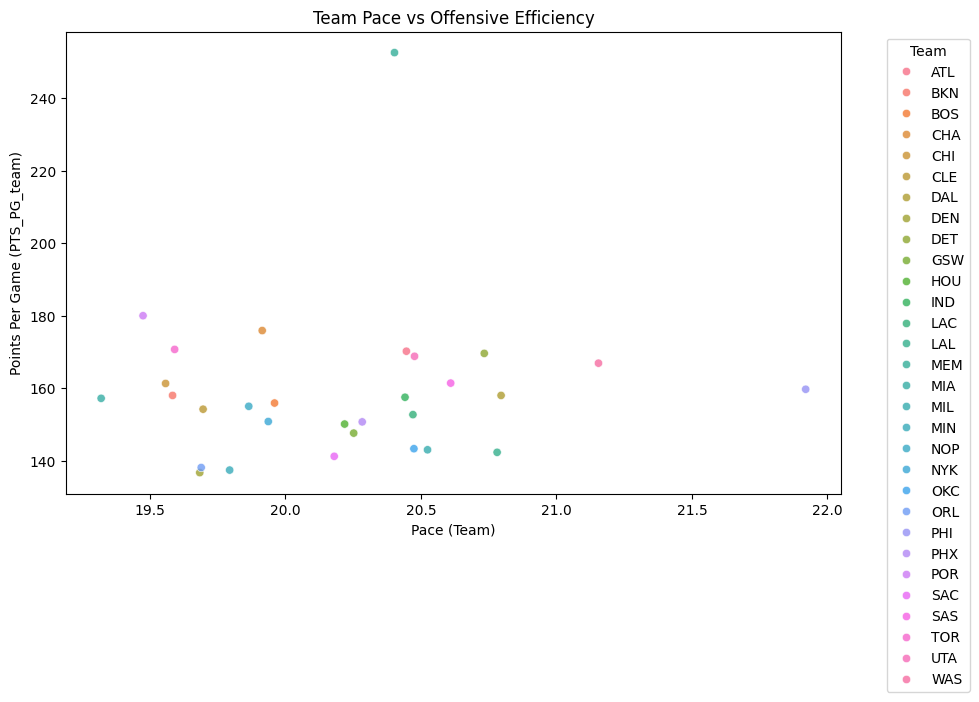

In [14]:
# Scatter plot for pace vs offensive efficiency
plt.figure(figsize=(10, 6))
sns.scatterplot(data=team_stats, x='Pace_team', y='PTS_PG_team', hue='TEAM_ABBREVIATION', alpha=0.8)
plt.title('Team Pace vs Offensive Efficiency')
plt.xlabel('Pace (Team)')
plt.ylabel('Points Per Game (PTS_PG_team)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Team')
plt.show()

/var/folders/0c/zn_s4ngs4tsbd8lhp838h4ph0000gn/T/ipykernel_5009/4277214700.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=player_stats_melted, x='Metric', y='Value', palette='Set2')


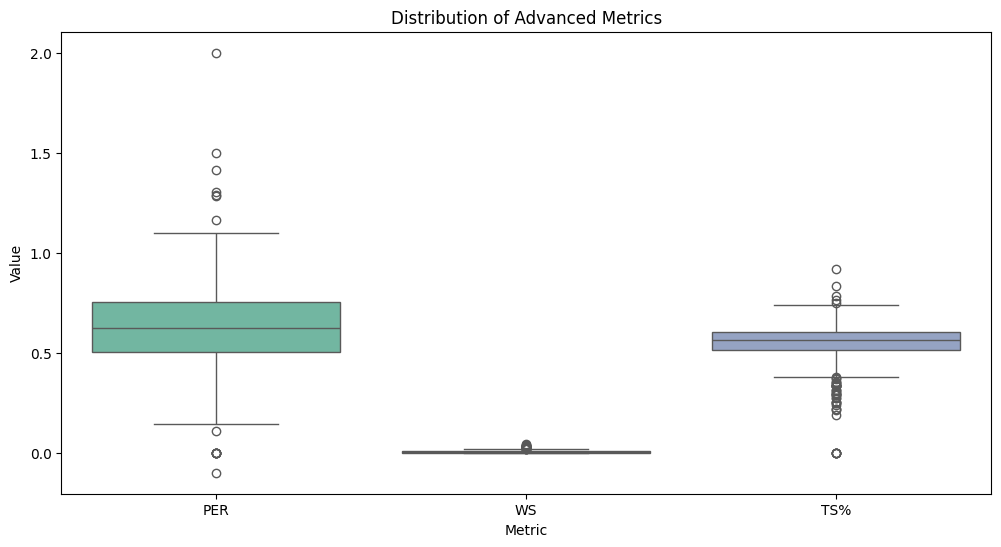

In [15]:
# Advanced metrics to visualize
advanced_metrics = ['PER', 'WS', 'TS%']

# Create boxplots for advanced metrics
plt.figure(figsize=(12, 6))
player_stats_melted = player_stats.melt(value_vars=advanced_metrics, var_name='Metric', value_name='Value')

sns.boxplot(data=player_stats_melted, x='Metric', y='Value', palette='Set2')
plt.title('Distribution of Advanced Metrics')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.show()

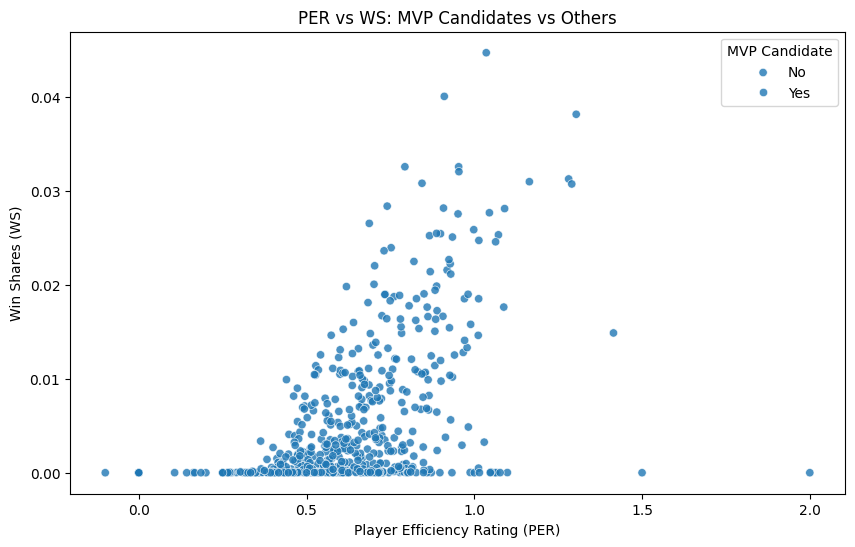

In [16]:
# Assuming historical MVP data is added
player_stats['MVP_Candidate'] = player_stats['PLAYER_FULLNAME'].apply(
    lambda x: 1 if x in ['Nikola Jokic', 'Giannis Antetokounmpo'] else 0  # Example MVPs
)

# Scatter plot for PER vs WS
plt.figure(figsize=(10, 6))
sns.scatterplot(data=player_stats, x='PER', y='WS', hue='MVP_Candidate', style='MVP_Candidate', alpha=0.8)
plt.title('PER vs WS: MVP Candidates vs Others')
plt.xlabel('Player Efficiency Rating (PER)')
plt.ylabel('Win Shares (WS)')
plt.legend(title='MVP Candidate', labels=['No', 'Yes'])
plt.show()